In [55]:
import numpy as np
from numpy import linalg as LA
import time, random
import matplotlib.pyplot as plt
import math

# <center>Cost Function and Gradient as Matrix Multiplication</center>

We defined our function as $J(\theta)=\frac{1}{m}\sum_{i=1}^{m}-y_i\log{(g(x_{i,*}\theta))}-(1-y_i)\log{(1-g(x_{i,*}\theta))}$, where $g(z)=\frac{1}{1+e^{-z}}$. Rewriting the inside summation

$$
-y_i\log{(g(x_{i,*}\theta))}-(1-y_i)\log{(1-g(x_{i,*}\theta))}=
y_i\log{(1+e^{-x_{i,*}\theta})}-(1-y_i)\log{(e^{-x_{i,*}\theta})}+(1-y_i)\log{(1+e^{-x_{i,*}\theta})}
$$

$$
=(1-y_i)(x_{i,*}\theta)+\log{(1+e^{-x_{i,*}\theta})}
$$

$$
=\log{(1+e^{-x_{i,*}\theta})}+(x_{i,*}\theta)-(y_i)(x_{i,*}\theta)
$$

$$
=\log{(1+e^{-x_{i,*}\theta})}-\ln{(e^{-x_{i,*}\theta})}-(y_i)(x_{i,*}\theta)
$$

$$
=\log{(1+e^{x_{i,*}\theta})}-(y_i)(x_{i,*}\theta)
$$

Hence, a more compact way of expressing the cost function is: 

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m} \log{(1+e^{x_{i,*}\theta})}-(y_i)(x_{i,*}\theta)$$

$$J(\theta)=-\frac{1}{m}(\tilde{X}\theta)^tY+\frac{1}{m}\sum_{i=1}^{m}\log(1+e^{x_{i,*}\theta})$$


We can now easily compute partial derivatives

$$\frac{\partial J}{\partial\theta_k} = \frac{1}{m}\sum_{i=1}^{m} \frac{x_{ik}e^{x_{i,*}\theta}}{1+e^{x_{i,*}\theta}} - x_{ik}y_i$$

$$ = \frac{1}{m}\sum_{i=1}^{m} x_{ik} \biggl(\frac{1}{1+e^{-x_{i,*}\theta}} - y_i\biggl)$$

$$ = \frac{1}{m}\sum_{i=1}^{m} x_{ik} (g(x_{i,*}\theta) - y_i)$$

$$ = \frac{1}{m}(x_{*,k})^t[g(\tilde{X}\theta)-Y]$$

It follows that

$$\nabla J = \frac{1}{m}(\tilde{X})^t[g(\tilde{X}\theta)-Y]$$

In [2]:
def calculateCost(X, Y, theta):
    return 1/len(X)*(np.log(1+np.exp(X@theta)).sum()-X@theta@Y)

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def getNewTheta(X,Y, theta, alpha = 1):
    c = sigmoid(X@theta)-Y
    return theta-alpha*X.T@c/len(X)

In [4]:
def runLogisticRegression(X,Y, theta, steps, alpha = 1, log = False):
    
    ans = theta        
    stepCount = [0]
    cost = [calculateCost(X, Y, ans)]

    for i in range(steps):
        ans = getNewTheta(X, Y, ans, alpha)
        cost.append(calculateCost(X, Y, ans))
        stepCount.append(i+1)
        
    plt.scatter(stepCount, cost)
    plt.title('Cost vs Steps')
    plt.xlabel('Steps')
    plt.ylabel('Cost')
    
    if log:
        plt.xscale('log')
        plt.yscale('log')
    
    plt.show()
        
    return ans

In [ ]:
# have not yet tested if this code actually works since I have not found some sample data fit for logistic regression

In [5]:
import pandas as pd

In [7]:
# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Print the type of the returned object
print("os.getcwd() returns an object of type: {0}".format(type(cwd)))

# Change the current working directory
os.chdir('/Users/alexchandler/Documents/GitHub/knot_machine_learning/dataset')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/alexchandler/Documents/GitHub/knot_machine_learning/logistic_regression
os.getcwd() returns an object of type: <class 'str'>
Current working directory: /Users/alexchandler/Documents/GitHub/knot_machine_learning/dataset


In [42]:
knot_info = pd.read_excel('knotinfo_data_complete.xls',
skiprows = [1],
header=0,
index_col=False,
keep_default_na=True
)

In [43]:
knot_info 

,name,name_anon,diagram,diagram_anon,category,category_anon,knot_atlas,knot_atlas_anon,knotilus_page,knotilus_page_anon,...,adequate,adequate_anon,montesinos_notation,montesinos_notation_anon,boundary_slopes,boundary_slopes_anon,pretzel_notation,pretzel_notation_anon,double_slice_genus,double_slice_genus_anon
0,0_1,diagram_display.php?_1,0_1-50.png,diagram_display.php?_1,0,NaN,0.1,http://katlas.math.toronto.edu/wiki/0_1,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,P(1),NaN,NaN,NaN
1,3_1,diagram_display.php?3_1,3_1-50.png,diagram_display.php?3_1,3,NaN,3.1,http://katlas.math.toronto.edu/wiki/3_1,Go,http://srankin.math.uwo.ca/cgi-bin/retrieve.cg...,...,Y,NaN,K(1/3),NaN,"{0,6}",NaN,"P(-1,-1,-1)",NaN,2,NaN
2,4_1,diagram_display.php?4_1,4_1-50.png,diagram_display.php?4_1,4,NaN,4.1,http://katlas.math.toronto.edu/wiki/4_1,Go,http://srankin.math.uwo.ca/cgi-bin/retrieve.cg...,...,Y,NaN,K(2/5),NaN,"{-4,0,4}",NaN,"P(1,1,2)",NaN,2,NaN
3,5_1,diagram_display.php?5_1,5_1-50.png,diagram_display.php?5_1,5,NaN,5.1,http://katlas.math.toronto.edu/wiki/5_1,Go,http://srankin.math.uwo.ca/cgi-bin/retrieve.cg...,...,Y,NaN,K(1/5),NaN,"{0,10}",NaN,"P(-1,-1,-1,-1,-1)",NaN,4,NaN
4,5_2,diagram_display.php?5_2,5_2-50.png,diagram_display.php?5_2,5,NaN,5.2,http://katlas.math.toronto.edu/wiki/5_2,Go,http://srankin.math.uwo.ca/cgi-bin/retrieve.cg...,...,Y,NaN,K(3/7),NaN,"{0,4,10}",NaN,"P(-1,-1,-3)",NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,12n_884,diagram_display.php?12n_884,12n_884-50.png,diagram_display.php?12n_884,12n,NaN,NaN,NaN,Go,http://srankin.math.uwo.ca/cgi-bin/retrieve.cg...,...,NaN,NaN,Not Montesinos,NaN,NaN,NaN,NaN,NaN,2,NaN
2974,12n_885,diagram_display.php?12n_885,12n_885-50.png,diagram_display.php?12n_885,12n,NaN,NaN,NaN,Go,http://srankin.math.uwo.ca/cgi-bin/retrieve.cg...,...,NaN,NaN,Not Montesinos,NaN,NaN,NaN,NaN,NaN,2,NaN
2975,12n_886,diagram_display.php?12n_886,12n_886-50.png,diagram_display.php?12n_886,12n,NaN,NaN,NaN,Go,http://srankin.math.uwo.ca/cgi-bin/retrieve.cg...,...,NaN,NaN,Not Montesinos,NaN,NaN,NaN,NaN,NaN,2,NaN
2976,12n_887,diagram_display.php?12n_887,12n_887-50.png,diagram_display.php?12n_887,12n,NaN,NaN,NaN,Go,http://srankin.math.uwo.ca/cgi-bin/retrieve.cg...,...,NaN,NaN,Not Montesinos,NaN,NaN,NaN,NaN,NaN,4,NaN


In [44]:
knot_info['signature'] 

0       0
1      -2
2       0
3      -4
4      -2
       ..
2973    0
2974    0
2975   -2
2976   -4
2977   -8
Name: signature, Length: 2978, dtype: int64

In [45]:
knot_info['determinant']

0         0
1         3
2         5
3         5
4         7
       ... 
2973     81
2974    149
2975    159
2976    125
2977     45
Name: determinant, Length: 2978, dtype: int64

In [46]:
knot_info['alternating']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
2973    N
2974    N
2975    N
2976    N
2977    N
Name: alternating, Length: 2978, dtype: object

In [47]:
X = knot_info[['determinant','signature']]

In [48]:
X

,determinant,signature
0,0,0
1,3,-2
2,5,0
3,5,-4
4,7,-2
...,...,...
2973,81,0
2974,149,0
2975,159,-2
2976,125,-4


In [49]:
y = knot_info['alternating']

In [50]:
y

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
2973    N
2974    N
2975    N
2976    N
2977    N
Name: alternating, Length: 2978, dtype: object

In [51]:
def YN_to_int(let):
    if let == 'Y':
        return 1
    elif let == 'N':
        return 0
    else:
        print(let)
        
YN_to_int_vect = np.vectorize(YN_to_int)

In [52]:
yp = YN_to_int_vect(y)

In [53]:
yp

array([1, 1, 1, ..., 0, 0, 0])

In [57]:
random.random()

0.8112079124659163

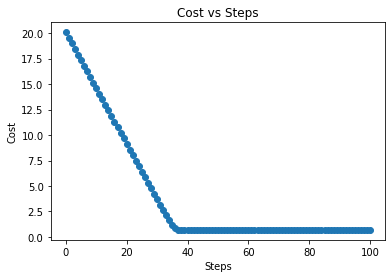

determinant    0.016684
signature      0.581525
dtype: float64

In [62]:
theta = np.array([random.random(),random.random()])
runLogisticRegression(X,yp, theta, 100, alpha = .001, log = False)